In [170]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [171]:
path_list = [
    "../00_Data/testset_2015_1h/2015082215",
    "../00_Data/testset_2015_1h/2015092215",
    "../00_Data/testset_2015_1h/2015102215"
]
p = "../00_Data/testset_2015_1h/2015092215"

In [172]:
#for p in path_list:
#for i in list(range(1)):

fc = prep.get_fc(p, 0)
df = prep.get_dataframe(fc)

# DF with no correction
df = prep.calcIds(df, 0.9)

dft = prep.df_to_timeseries(df)
dft_corrected = dft.copy().apply(prep.fill_gaps, axis=1)

# DF with correction
df_corrected = prep.timeseries_to_df(dft_corrected, df)


### XXX	get frame container from ../00_Data/testset_2015_1h/2015092215 for cam 0

### get dataframe
Number of Frames: 1024
Number of Detections: 44673

### Calc IDs with threshold: 0.9
#Detections before calcualting IDs: 44673
Number of Detections after calcualting IDs: 33471


In [173]:
def get_close_bees(df, distance):
    print("\n### get close ({}) bees".format(distance))
    print('Number of Detections before keeping close bees pairs: {}'.format(df.shape[0]))
    
    df = df.reset_index(level = 'frame_idx')
    
    m = pd.merge(df, df, on='frame_idx')
    m = m[m.id_x < m.id_y]
    
    m.loc[:, 'dist'] = np.sqrt(np.square(m.xpos_x - m.xpos_y) \
        + np.square(m.ypos_x - m.ypos_y))

    print('Number of all bee pairs: {}'.format(m.shape[0]))
    filtered = m[m.dist <= distance]
    print('Number of close bee pairs: {}'.format(filtered.shape[0]))
    return filtered

In [174]:
df.head(10)

xpos  ypos  zRotation     timestamp  \
fc_id                frame_idx idx                                        
-3739417886559357715 0         0     150  1612  -1.889372  1.442934e+09   
                               1     164  2362  -0.572761  1.442934e+09   
                               2     176  2638  -0.128358  1.442934e+09   
                               3     225  1262  -1.426560  1.442934e+09   
                               4     227  1874   0.216768  1.442934e+09   
                               6     263  2174  -0.651528  1.442934e+09   
                               10    352  3725  -0.181263  1.442934e+09   
                               11    362  1938   2.568821  1.442934e+09   
                               12    387  2250   2.000879  1.442934e+09   
                               13    411  2437   2.919696  1.442934e+09   

                                    cam_id  confidence    id  
fc_id                frame_idx idx                            
-3739417886559357715 0         0         0    1.000000   884  
                               1         0    1.000000  1449  
                               2         0    1.000000   833  
                               3         0    0.945098   237  
                               4         0    1.000000  1668  
                               6         0    0.992157  1205  
                               10        0    0.929412  3542  
                               11        0    1.000000   596  
                               12        0    1.000000  1285  
                               13        0    0.905882  1405

## Reshape close bee pairs to timeseries

In [175]:
close = get_close_bees(df, 150)


### get close (150) bees
Number of Detections before keeping close bees pairs: 33471
Number of all bee pairs: 546282
Number of close bee pairs: 6830


In [176]:
close2 = close[['frame_idx', 'id_x', 'id_y']]
close2 = close2.set_index(['frame_idx'])
close2

,id_x,id_y
frame_idx,,
0,1205,1285
0,596,1668
0,1365,1405
0,633,797
0,857,1045
1,237,989
1,1365,1405
1,857,1433
1,857,1045


In [177]:
num_columns = 1024
close2.shape

(6830, 2)

In [178]:
close2['pair'] = list(zip(close2.id_x, close2.id_y))
u_pairs = close2.pair.unique()
len(u_pairs)

724

In [179]:
dft = DataFrame(0, index=u_pairs, columns=np.arange(1024))
gr = close2.groupby(level='frame_idx')

In [180]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
"(1205, 1285)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(596, 1668)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1365, 1405)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(633, 797)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(857, 1045)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
for i, group in gr:
    l = group['pair']
    dft.loc[l,i] = 1

In [182]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
"(1205, 1285)",1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(596, 1668)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1365, 1405)",1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
"(633, 797)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(857, 1045)",1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [183]:
dft['summe'] = dft.sum(axis=1)

In [184]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,summe
"(1205, 1285)",1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"(596, 1668)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"(1365, 1405)",1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,21
"(633, 797)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"(857, 1045)",1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,102


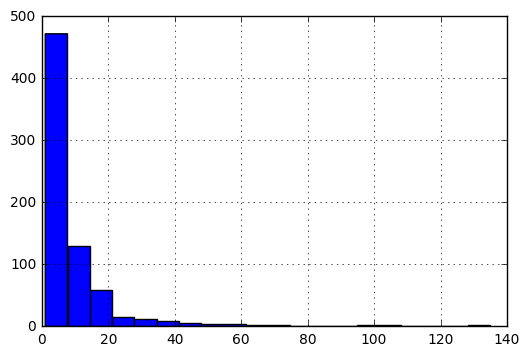

In [185]:
dft.summe.hist(bins=20)

In [186]:
dft.summe.describe()

count    724.000000
mean       9.433702
std       15.118518
min        1.000000
25%        2.000000
50%        5.000000
75%       10.250000
max      135.000000
Name: summe, dtype: float64

In [187]:
dft.summe.value_counts().sort_index()

1      165
2       66
3       77
4       53
5       33
6       42
7       36
8       30
9       23
10      18
11      17
12      12
13      19
14      11
15      15
16       8
17       7
18       8
19       4
20      10
21       6
22       1
23       7
24       2
26       3
27       2
28       2
31       3
32       2
33       4
34       1
35       1
36       2
37       2
38       1
41       3
43       1
44       4
46       1
48       2
51       2
56       3
60       1
66       3
68       2
79       1
84       1
98       1
99       1
102      2
103      1
133      1
135      1
Name: summe, dtype: int64

In [188]:
def get_ketten(kette, val):
    counter = 0
    laengen = []
    for i in list(range(len(kette))):
        if (kette[i] == val):
            counter = counter + 1
        else:
            if (counter > 0):
                laengen.append(counter)
                counter = 0
    if (counter > 0):
        laengen.append(counter)

    return laengen

In [217]:
kette1 = dft.apply(get_ketten, axis=1, args=[1])
kette1

(1205, 1285)                                               [1, 1]
(596, 1668)                                                [1, 1]
(1365, 1405)                                      [6, 2, 3, 9, 1]
(633, 797)                                                 [1, 1]
(857, 1045)     [2, 3, 3, 7, 5, 13, 8, 2, 9, 3, 1, 2, 5, 3, 6,...
(237, 989)                                                 [1, 1]
(857, 1433)                                 [3, 4, 2, 1, 9, 4, 1]
(884, 3076)                                 [2, 2, 5, 8, 1, 1, 1]
(969, 2024)                                             [1, 2, 2]
(633, 1045)                                       [2, 1, 1, 1, 1]
(2024, 3349)                                               [1, 1]
(1205, 2024)                                           [3, 1, 12]
(1285, 2024)                                            [2, 1, 1]
(884, 1085)                                       [4, 2, 6, 1, 1]
(317, 1025)                                                [7, 2]
(633, 857)

In [190]:
slist = [item for row in kette1 for item in row]

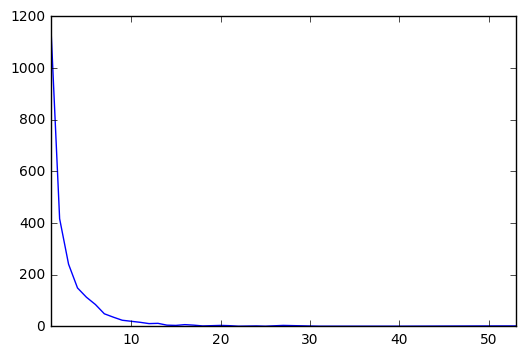

In [191]:
Series(slist).value_counts().sort_index().plot()

In [192]:
Series(slist).value_counts().sort_index()

1     1179
2      417
3      241
4      149
5      113
6       85
7       49
8       36
9       24
10      20
11      16
12      11
13      12
14       5
15       4
16       7
17       5
18       2
19       3
20       4
21       3
22       1
24       2
25       1
27       4
31       1
32       1
40       1
51       2
53       2
dtype: int64

In [193]:
l = [1,2,3,4,5,6]
f = [x for x in l if x > 3]

In [194]:
f

[4, 5, 6]

In [218]:
kette1.head()

(1205, 1285)                                               [1, 1]
(596, 1668)                                                [1, 1]
(1365, 1405)                                      [6, 2, 3, 9, 1]
(633, 797)                                                 [1, 1]
(857, 1045)     [2, 3, 3, 7, 5, 13, 8, 2, 9, 3, 1, 2, 5, 3, 6,...
dtype: object

In [230]:
k = kette1.apply(lambda x: len([item for item in x if item>3]))

In [231]:
k.head()

(1205, 1285)    0
(596, 1668)     0
(1365, 1405)    2
(633, 797)      0
(857, 1045)     9
dtype: int64

In [233]:
filteredout = k[k > 0]

In [240]:
for elem in filteredout.iteritems():
    print(elem)

((1365, 1405), 2)
((857, 1045), 9)
((857, 1433), 3)
((884, 3076), 2)
((1205, 2024), 1)
((884, 1085), 2)
((317, 1025), 1)
((989, 1468), 1)
((1405, 2024), 1)
((649, 1085), 4)
((596, 1085), 1)
((745, 1085), 4)
((833, 1449), 3)
((1144, 3199), 3)
((1205, 1405), 4)
((797, 1285), 1)
((649, 884), 1)
((1108, 3199), 2)
((596, 649), 2)
((1205, 1240), 1)
((2694, 3076), 2)
((989, 1265), 1)
((596, 2694), 1)
((1240, 1285), 7)
((797, 857), 4)
((745, 969), 1)
((1108, 1265), 1)
((649, 1364), 1)
((392, 1365), 1)
((1108, 2694), 1)
((596, 2153), 1)
((1144, 2694), 1)
((1133, 1313), 1)
((2153, 3076), 3)
((1108, 2153), 1)
((1144, 2153), 1)
((649, 1108), 1)
((392, 2069), 1)
((605, 1468), 2)
((1085, 2153), 1)
((1205, 1364), 1)
((1365, 2069), 3)
((633, 1265), 1)
((3076, 3437), 2)
((2153, 3437), 1)
((3199, 3437), 8)
((1133, 1364), 1)
((392, 777), 1)
((765, 969), 8)
((3076, 3199), 5)
((989, 1093), 2)
((1240, 1364), 1)
((649, 1133), 1)
((1285, 1364), 2)
((605, 2782), 2)
((57, 192), 2)
((745, 3279), 2)
((969, 1433),